### Import, pickle and comparison of transcriptomes

Transcriptome according to Shah/Plotkin (http://www.sciencedirect.com/science/article/pii/S0092867413006557) (drawn randomly from Ingolia (2009)):

In [57]:
%matplotlib inline
import os.path
import csv
import pandas as pd
import cPickle as pkl

datadir = "../data"

In [58]:
transcriptome_plotkin_file = "S.cer.mRNA.abndc.ini.tsv"
transcriptome_plotkin_path = os.path.join(datadir, transcriptome_plotkin_file)

transcriptome_plotkin = {}

with open(transcriptome_plotkin_path, mode='r') as tsvin:
    tsvin = csv.reader(tsvin, delimiter='\t')
    tsvin.next() # skip header

    for row in tsvin:
        ORF_name = row[0]
        count = int(row[2])
        transcriptome_plotkin[ORF_name] = count

In [59]:
data = transcriptome_plotkin.values()
pd.Series(data).describe()

count    4839.000000
mean       12.399256
std        45.559384
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      1283.000000
dtype: float64

In [60]:
sum(data)

60000

In [61]:
pkl.dump(transcriptome_plotkin, open("../parameters/transcriptome_plotkin.p", "wb"))

Transcriptome according to Lipson et al. (2009) (http://www.ncbi.nlm.nih.gov/pubmed/19581875), using single-molecule sequencing digital gene expression (smsDGE):

In [76]:
transcriptome_lipson_file = r"nbt.1551-S2.csv"
transcriptome_lipson_path = os.path.join(datadir, transcriptome_lipson_file)

transcriptome_lipson = {}

with open(transcriptome_lipson_path, mode='r') as infile:
    reader = csv.reader(infile)
    reader.next() # skip header line
    
    transcriptome_lipson = {rows[1]:int(float(rows[9].replace(',','.'))) for rows in reader} # (percentage of the) transcriptome
    #transcriptome_lipson = [(rows[1], rows[9]) for rows in reader] # (percentage of the) transcriptome
    #transcriptome_lipson = [rows for rows in reader] # (percentage of the) transcriptome


In [78]:
data = transcriptome_lipson.values()
pd.Series(data).describe()

count     6710.000000
mean       148.567809
std        582.981330
min          0.000000
25%         16.000000
50%         44.000000
75%         93.000000
max      15909.000000
dtype: float64

In [79]:
sum(data)

996890

In [83]:
pkl.dump(transcriptome_lipson, open("../parameters/transcriptome_lipson.p", "wb"))

Scatterplot of transcriptomes:

In [80]:
df1 = pd.DataFrame.from_dict(transcriptome_plotkin.items())
df1.columns = ['name', 'n_plotkin']

df2 = pd.DataFrame.from_dict(transcriptome_lipson.items())
df2.columns = ['name', 'n_lipson']

In [81]:
df = pd.merge(df1, df2, left_on='name', right_on='name', how='outer')

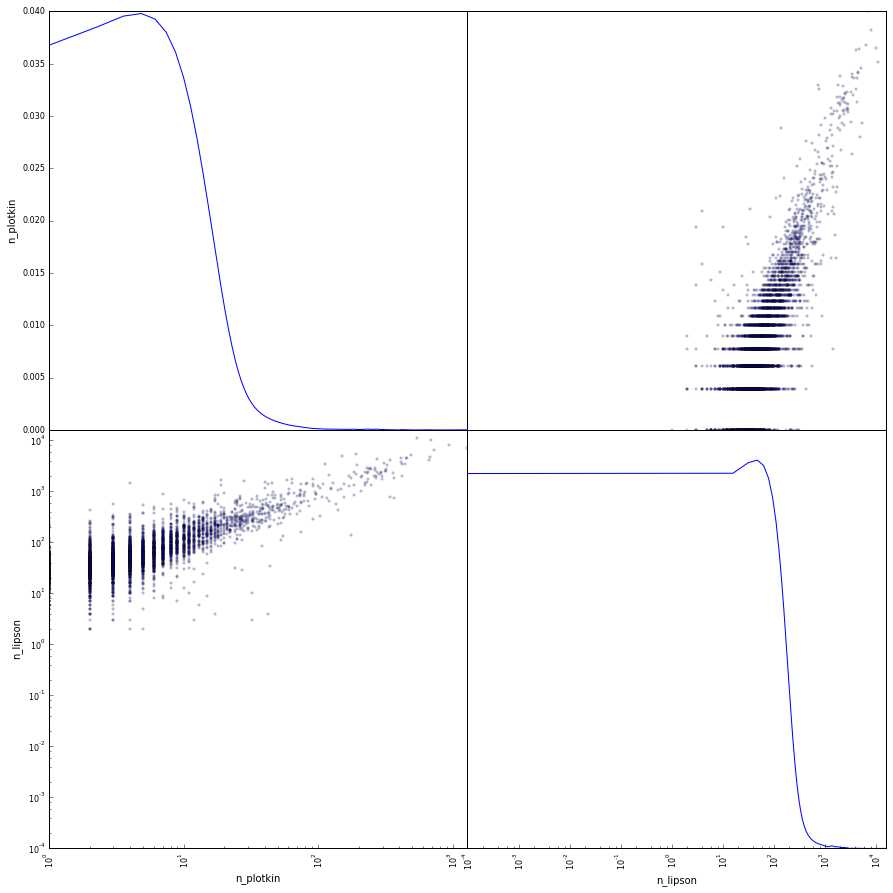

In [82]:
axl = pd.scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = max(0.0001, df[df.columns[i+1]].min())
        minj = max(0.0001, df[df.columns[j+1]].min())
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj, df[df.columns[j+1]].max()]) 
            ax.set_ylim([mini, df[df.columns[i+1]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j+1]].max()])
            ax.set_xscale('log')            